<a href="https://colab.research.google.com/github/engineerjkk/DeepLearning_from_Scratch/blob/main/conv_and_pooling_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from termcolor import colored

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

In [4]:
def p_color(input_string,input_object):
  print(colored(input_string+':','magenta'))
  print(colored('shape: ','cyan'),input_object.shape,'\n')

50 by 50의 그레이 스케일 이미지를 생성

In [5]:
test_image=tf.random.normal(mean=0,stddev=1,shape=(1,50,50,50,1))

In [6]:
conv=Conv2D(filters=1,kernel_size=3,strides=1,padding='valid')
conved=conv(test_image)

p_color('input',test_image)
p_color('after conv',conved)

input:
shape:  (1, 50, 50, 50, 1) 

after conv:
shape:  (1, 50, 48, 48, 1) 



In [8]:
p_color('conv weight',conv.get_weights()[0])#weight
p_color('conv bias',conv.get_weights()[1]) #bias

conv weight:
shape:  (3, 3, 1, 1) 

conv bias:
shape:  (1,) 



In [9]:
# %%

In [10]:
test_image=tf.random.normal(mean=0,stddev=1,shape=(1,4,4,1))
maxpool=MaxPooling2D(pool_size=2,strides=2)
maxpooled=maxpool(test_image)

p_color('input',test_image)
p_color('after maxpool',maxpooled)

input:
shape:  (1, 4, 4, 1) 

after maxpool:
shape:  (1, 2, 2, 1) 



In [15]:
import cv2
import matplotlib.pyplot as plt


테스트 이미지

input:
shape:  (1, 4, 4, 1) 

[[-0.4126975  -0.22715317  1.1535974  -0.16786109]
 [-1.8070148   0.6800203   0.20824939 -1.4578717 ]
 [-1.2257807  -0.4560108   0.509548   -0.16023049]
 [-1.9775296  -1.3996936   0.0803608  -0.893739  ]]


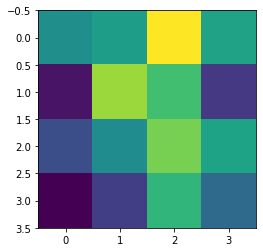

In [25]:
test_image.numpy().squeeze()
cv2.cvtColor( test_image.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( test_image.numpy().squeeze())
p_color('input',test_image)
print( test_image.numpy().squeeze())

맥스풀링 후

after maxpool:
shape:  (1, 2, 2, 1) 

[[ 0.6800203  1.1535974]
 [-0.4560108  0.509548 ]]


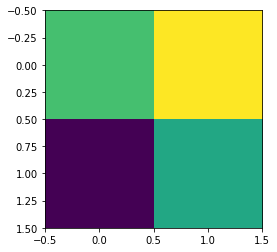

In [24]:
cv2.cvtColor( maxpooled.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( maxpooled.numpy().squeeze())
p_color('after maxpool',maxpooled)
print( maxpooled.numpy().squeeze())

In [20]:
avgpool=AveragePooling2D(pool_size=2,strides=2)
avgpooled=avgpool(test_image)

after avgpooled:
shape:  (1, 2, 2, 1) 

[[-0.4417113  -0.06597149]
 [-1.2647537  -0.11601517]]


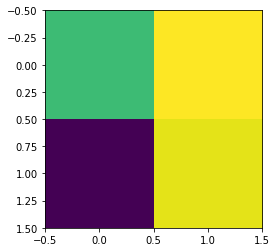

In [23]:
cv2.cvtColor( avgpooled.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( avgpooled.numpy().squeeze())
p_color('after avgpooled',avgpooled)
print(avgpooled.numpy().squeeze())

In [26]:
# %% 인티저로 바꿔보자

In [39]:
test_image=tf.random.uniform(minval=0,maxval=10,shape=(1,4,4,3),dtype=tf.int32)
maxpool=MaxPooling2D(pool_size=2,strides=2)
maxpooled=maxpool(test_image)

print(test_image.numpy().squeeze(),'\n')
print(maxpooled.numpy().squeeze(),'\n')

[[[0 9 5]
  [6 8 5]
  [5 9 4]
  [5 9 7]]

 [[2 0 4]
  [9 7 7]
  [5 1 9]
  [1 3 2]]

 [[2 4 8]
  [0 9 1]
  [0 2 4]
  [3 2 6]]

 [[6 0 8]
  [0 3 9]
  [3 8 4]
  [0 4 2]]] 

[[[9 9 7]
  [5 9 9]]

 [[6 9 9]
  [3 8 6]]] 



input_channel 0:
 [[0 6 5 5]
 [2 9 5 1]
 [2 0 0 3]
 [6 0 3 0]]
maxpool_channel 0:
 [[9 5]
 [6 3]]
input_channel 1:
 [[9 8 9 9]
 [0 7 1 3]
 [4 9 2 2]
 [0 3 8 4]]
maxpool_channel 1:
 [[9 9]
 [9 8]]
input_channel 2:
 [[5 5 4 7]
 [4 7 9 2]
 [8 1 4 6]
 [8 9 4 2]]
maxpool_channel 2:
 [[7 9]
 [9 6]]


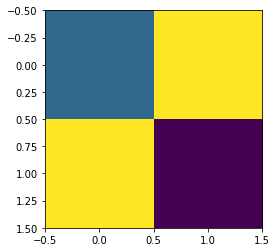

In [44]:
for channel_idx in range(3):
  print('input_channel {}:\n'.format(channel_idx),test_image[...,channel_idx].numpy().squeeze())
  #cv2.cvtColor( test_image.numpy().squeeze(), cv2.COLOR_BGR2RGB)
  plt.imshow( test_image[...,channel_idx].numpy().squeeze())
  print('maxpool_channel {}:\n'.format(channel_idx),maxpooled[...,channel_idx].numpy().squeeze())
  #cv2.cvtColor( maxpooled.numpy().squeeze(), cv2.COLOR_BGR2RGB)
  plt.imshow( maxpooled[...,channel_idx].numpy().squeeze())